In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,

In [7]:
df=pd.read_csv('Fish-Diversity-Prediction (1).csv')

In [9]:
df


,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [13]:
df.isnull().sum()

Category    0
Species     0
Weight      0
Height      0
Width       0
Length1     0
Length2     0
Length3     0
dtype: int64

In [15]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [19]:
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,0,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,0,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,0,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,0,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,0,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,5,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,5,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,5,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,5,19.7,2.8728,2.0672,13.2,14.3,15.2


In [21]:
y=df['Species']
x=df.drop(['Species'],axis=1)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression(max_iter=100000)

In [27]:
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)

In [29]:
score_1

0.9375

In [31]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(x_test)
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)
    

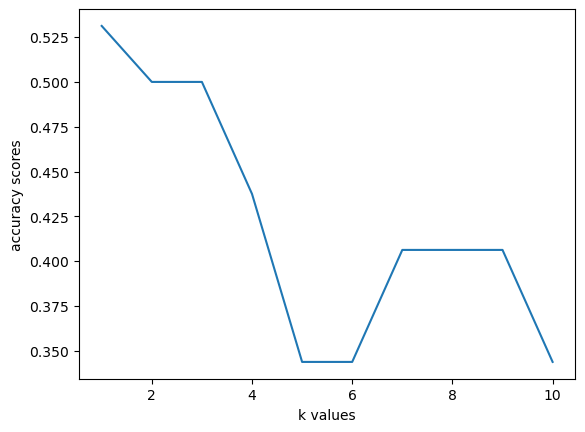

In [33]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),list_1)
plt.xlabel('k values')
plt.ylabel('accuracy scores')
plt.show()

In [35]:
print(max(list_1))

0.53125


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [71]:
# Load your dataset
df = pd.read_csv('Fish-Diversity-Prediction (1).csv')

# Display the first few rows of the dataset
df.head()


,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


 # Prepare the Data:

Assuming your dataset has features (e.g., environmental data) and a target variable that represents the fish diversity category (e.g., high, medium, low diversity):


Since Species is categorical, you'll need to encode it using LabelEncoder.

In [75]:
# Encode the 'Species' column to numerical values
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Define the features (X) and the target (y)
X = df.drop('Category', axis=1)
y = df['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 # Train the Logistic Regression Model:

In [78]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [80]:
 # Make Predictions

In [82]:
# Make predictions on the test data
y_pred = model.predict(X_test)


 # Evaluate the Model:

In [85]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 95.83%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         5
           5       0.67      1.00      0.80         4
           6       1.00      1.00      1.00         6
           7       1.00      0.33      0.50         3

    accuracy                           0.96        48
   macro avg       0.95      0.90      0.90        48
weighted avg       0.97      0.96      0.95        48



Prepare the Data:

Assuming your dataset has features (e.g., environmental data) and a target variable that represents the fish diversity category (e.g., high, medium, low diversity):

In [87]:
# Define the features (X) and the target (y)

X = df.drop('Category', axis=1)
y = df['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train the Logistic Regression Model:

In [91]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

Make Predictions:

In [94]:
# Make predictions on the test data
y_pred = model.predict(X_test)


Evaluate the Model:

In [97]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 95.83%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         5
           5       0.67      1.00      0.80         4
           6       1.00      1.00      1.00         6
           7       1.00      0.33      0.50         3

    accuracy                           0.96        48
   macro avg       0.95      0.90      0.90        48
weighted avg       0.97      0.96      0.95        48



Classification Report Heatmap:
A heatmap to visualize the precision, recall, and F1-score from the classification report.


Explanation:
Confusion Matrix:

This shows how many instances of each class were correctly and incorrectly classified.
ConfusionMatrixDisplay provides an easy way to visualize the confusion matrix.
Accuracy Score Bar Plot:

This bar plot shows the accuracy score of your logistic regression model.
It’s a straightforward way to visualize the model’s overall performance.
Classification Report Heatmap:

The classification report includes precision, recall, and F1-score for each class.
A heatmap allows you to visualize these metrics across different classes.

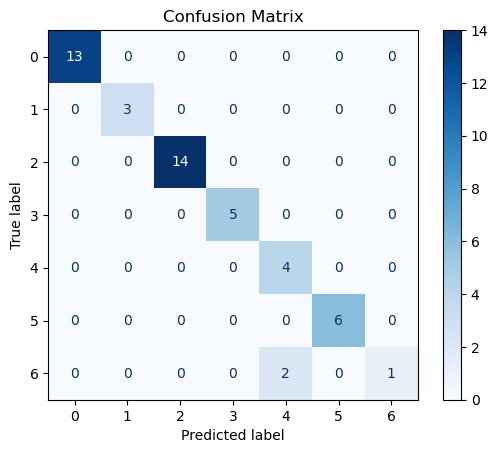

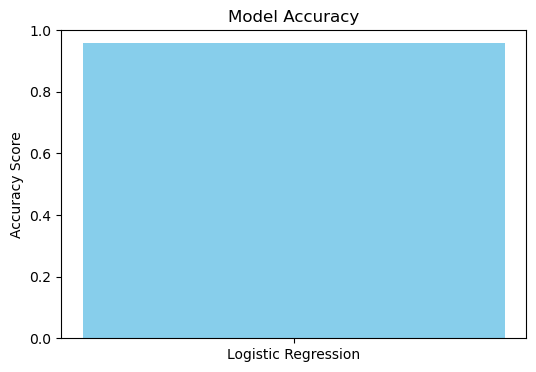

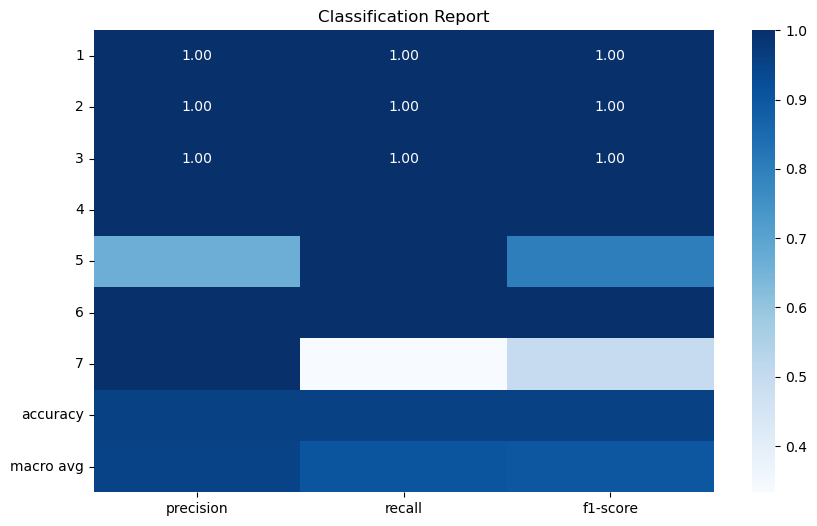

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Assuming you've already executed the logistic regression and have `y_test` and `y_pred`

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 2. Accuracy Score Bar Plot
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.show()

# 3. Classification Report Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report')
plt.show()


Here are some additional plots you can create:

1. ROC Curve (Receiver Operating Characteristic):
ROC curves are used to visualize the performance of a classifier across different thresholds. It's especially useful for binary classification.
2. Precision-Recall Curve:
This curve shows the trade-off between precision and recall for different thresholds, which is important when dealing with imbalanced datasets.
3. Feature Importance Plot:
If you’re using a model that can provide feature importance (e.g., RandomForest), you can plot the importance of each feature.
4. Learning Curve:
A learning curve shows how the model’s performance on the training set and validation set changes as more training data is used.
5. Residuals Plot:
Residuals plots show the differences between actual and predicted values, which can help identify patterns that the model is not capturing.

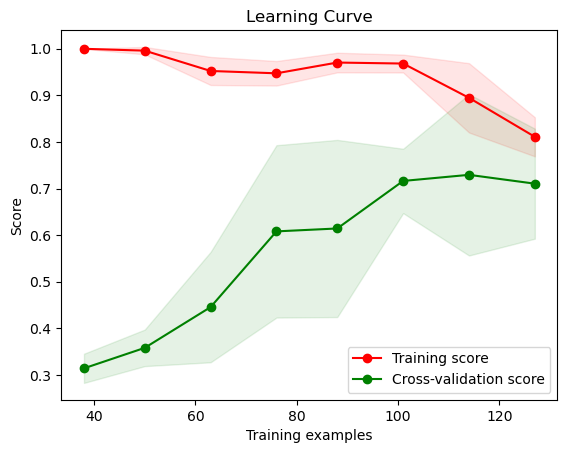

In [110]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()


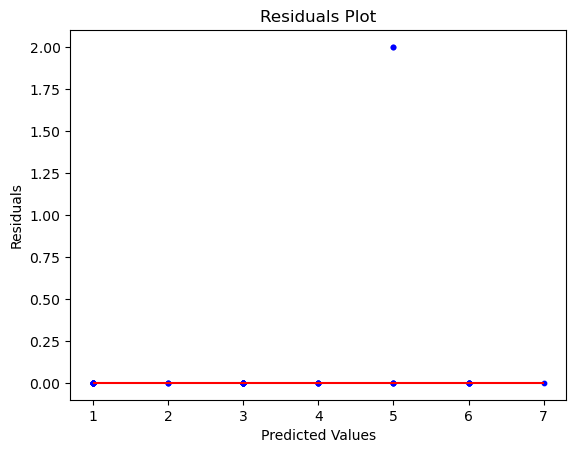

In [112]:
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure()
plt.scatter(y_pred, residuals, color='blue', s=10)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


1. Accuracy Visualization:
You can create a bar plot to show the accuracy of your Logistic Regression model, as well as compare it with other models if desired.

2. Species Distribution:
A bar plot or count plot showing the distribution of different species in the dataset.

3. Pair Plot:
A pair plot can help you visualize the relationships between different features for different species.

4. Correlation Heatmap:
A heatmap to show the correlation between different numerical features, which can give insights into how features are related.

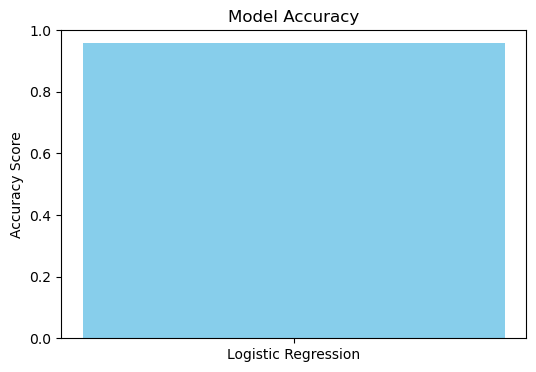

In [115]:
# Accuracy Bar Plot:
import matplotlib.pyplot as plt

# Assuming `accuracy` is already calculated
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.show()


In [117]:
# Species Distribution Plot:

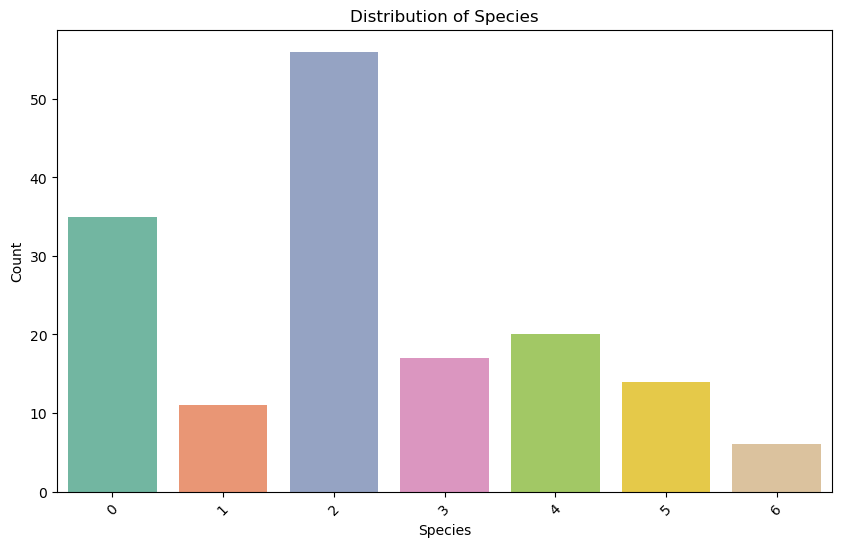

In [119]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Species', data=df, palette='Set2')
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Pair Plot:
This plot shows pairwise relationships in the dataset and how they differ by species.

C:\Users\Varsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Varsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Varsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Varsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

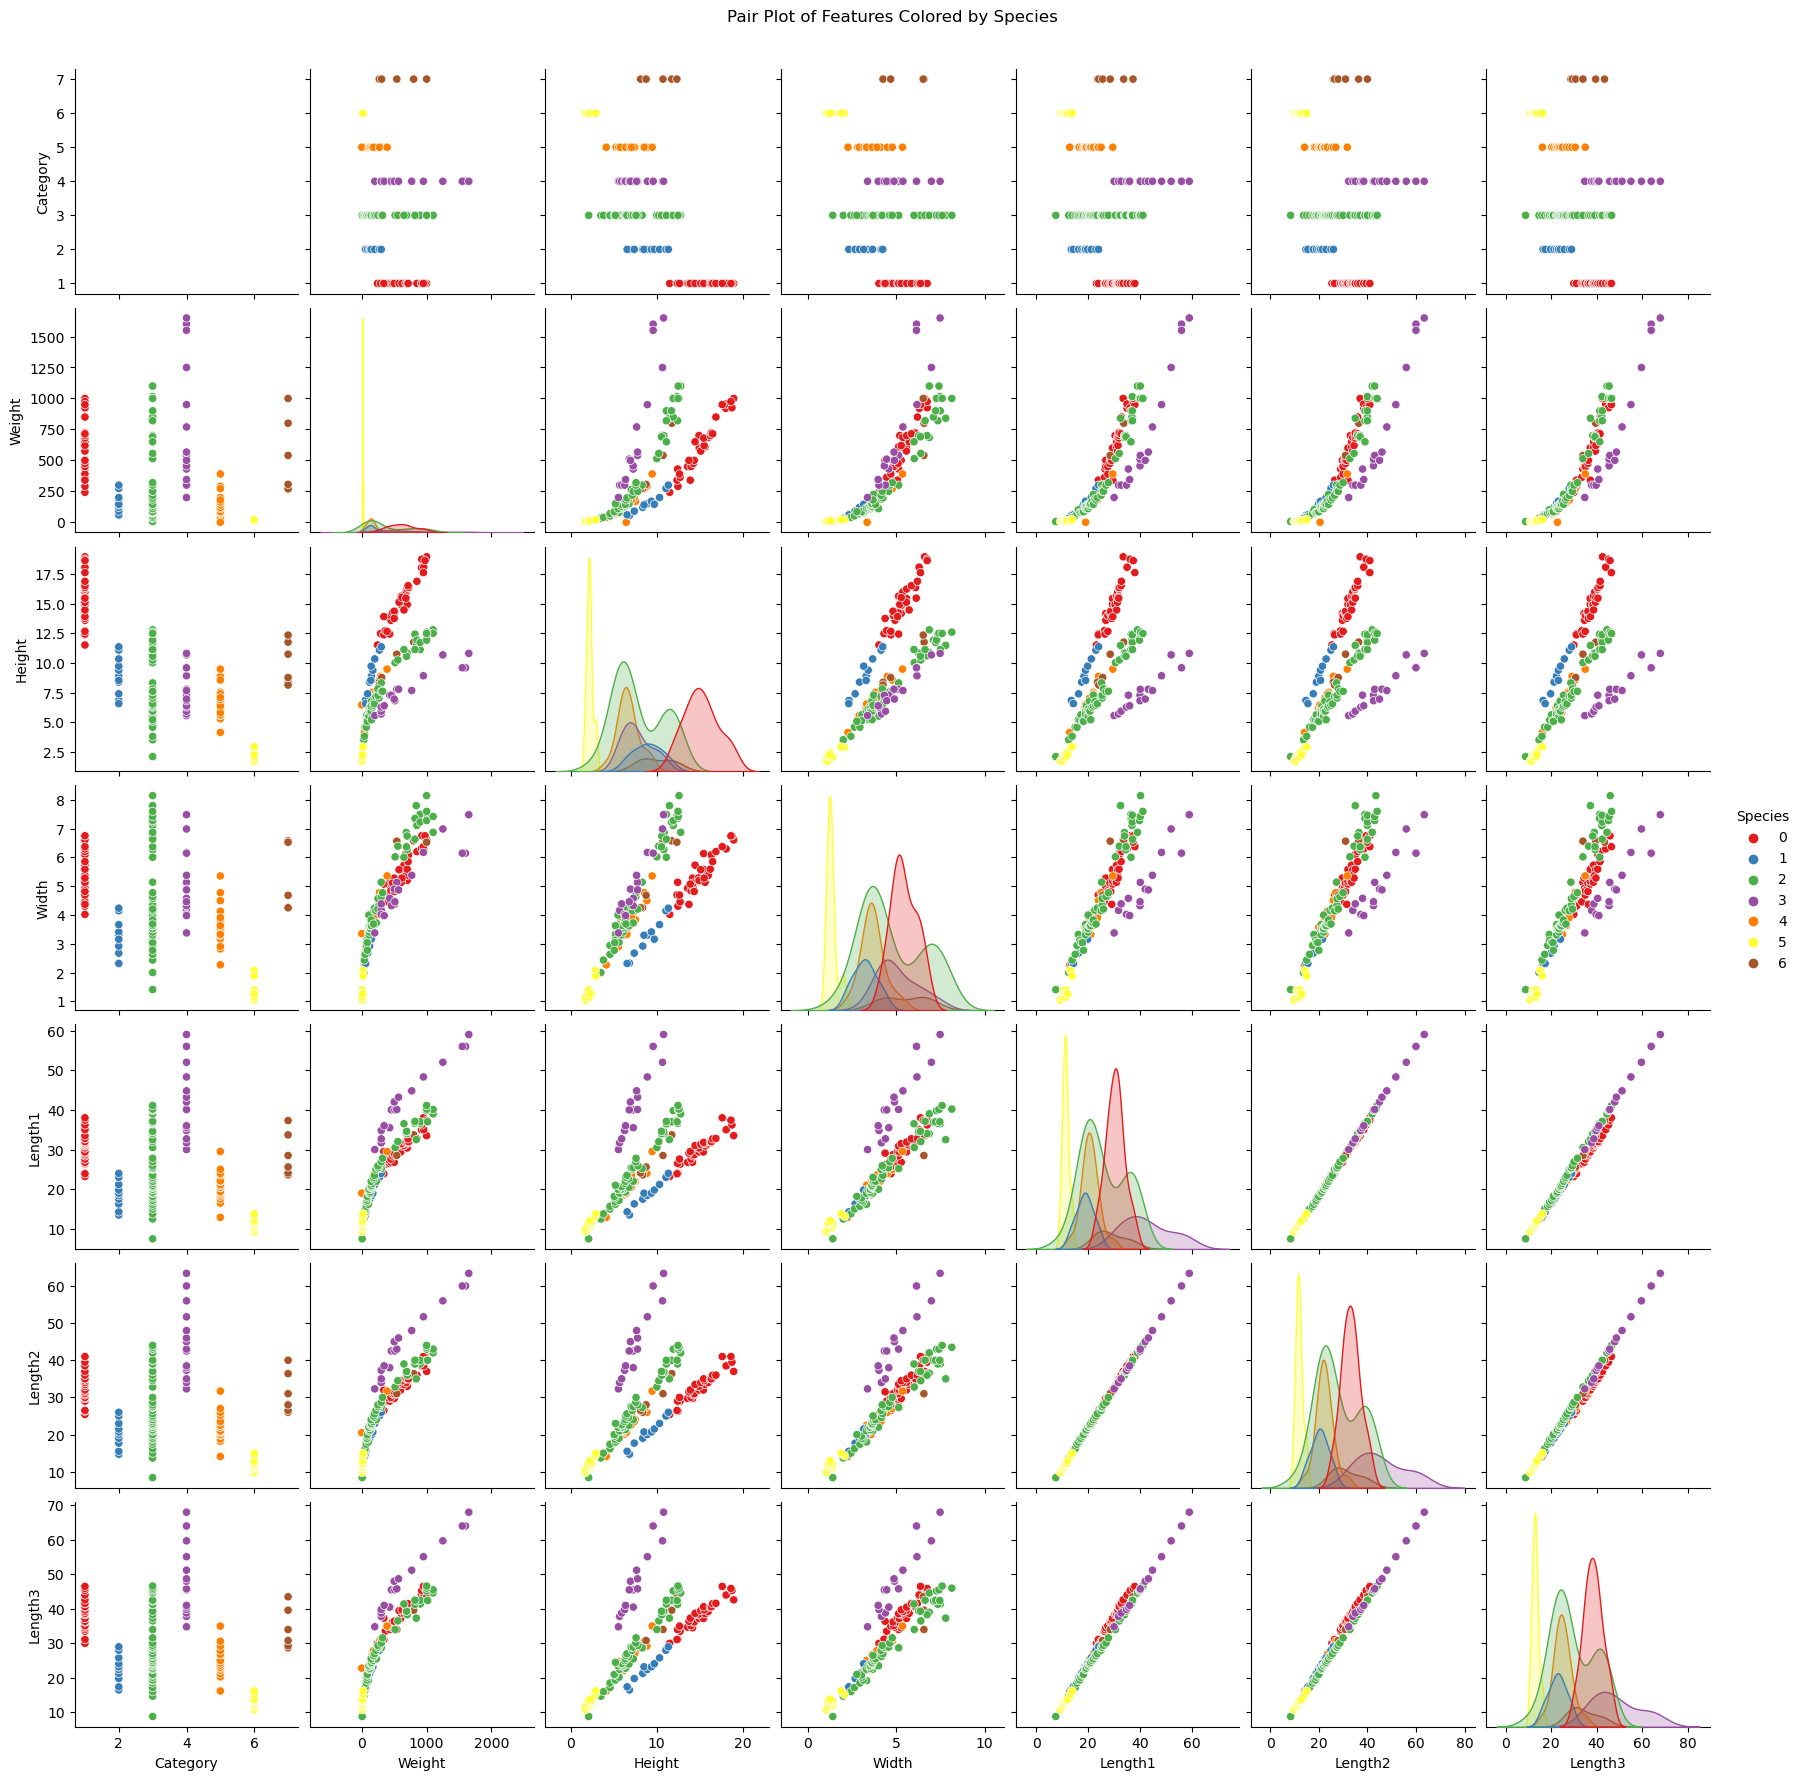

In [124]:
sns.pairplot(df, hue='Species', palette='Set1')
plt.suptitle('Pair Plot of Features Colored by Species', y=1.02)
plt.show()


Correlation Heatmap:
This heatmap shows the correlation between the numerical features in your dataset.

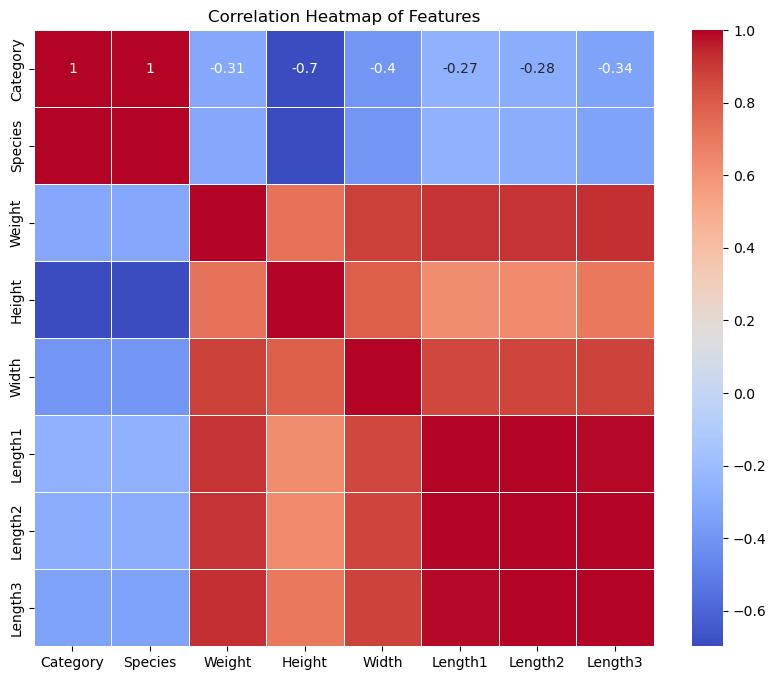

In [127]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


Explanation:
Accuracy Bar Plot:

This simple bar plot shows the accuracy score of the Logistic Regression model.
Species Distribution Plot:

The count plot (sns.countplot) shows the distribution of different species in your dataset. This can help you see which species are most common.
Pair Plot:

The pair plot (sns.pairplot) is useful for visualizing relationships between different numerical features, with the data points colored by species.
Correlation Heatmap:

The heatmap shows the correlation between numerical features. Strong correlations (close to 1 or -1) indicate that two features are related, which could be important for model building.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Fish-Diversity-Prediction (1).csv')

# Display the first few rows of the dataset
print(df.head())

# Display the column names
print(df.columns)


   Category Species  Weight   Height   Width  Length1  Length2  Length3
0         1   Bream   242.0  11.5200  4.0200     23.2     25.4     30.0
1         1   Bream   290.0  12.4800  4.3056     24.0     26.3     31.2
2         1   Bream   340.0  12.3778  4.6961     23.9     26.5     31.1
3         1   Bream   363.0  12.7300  4.4555     26.3     29.0     33.5
4         1   Bream   430.0  12.4440  5.1340     26.5     29.0     34.0
Index(['Category', 'Species', 'Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3'],
      dtype='object')


In [26]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode the 'Species' column to numerical values
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Define the features (X) and the target (y)
X = df.drop('Category', axis=1)
y = df['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         5
           7       1.00      0.33      0.50         3

    accuracy                           0.94        32
   macro avg       0.90      0.90      0.86        32
weighted avg       0.98      0.94      0.94        32

Confusion Matrix:
 [[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  2  0  1]]


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier


In [34]:
# Binarize the output
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Replace with your actual class labels
n_classes = y_bin.shape[1]


In [36]:
# Train the model with One-vs-Rest strategy
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_score = model.predict_proba(X_test)


Skipping class 0 due to insufficient positive samples.


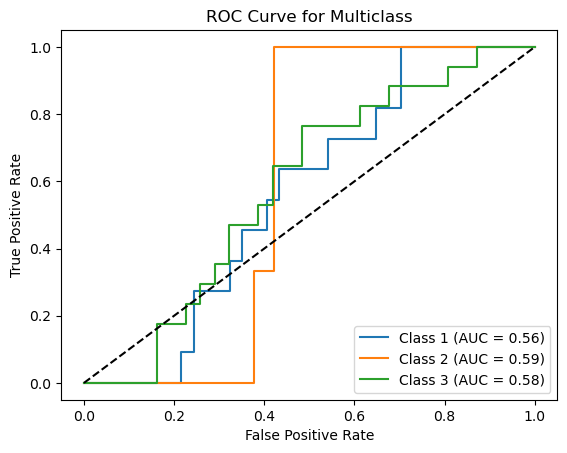

In [40]:
# Import necessary library for stratified split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Encode the 'Species' column to numerical values
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Define the features (X) and the target (y)
X = df.drop('Category', axis=1)
y = df['Category']

# Perform a stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Binarize the output
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Replace with your actual class labels
n_classes = y_bin.shape[1]

# Train the model with One-vs-Rest strategy
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    if len(np.unique(y_bin[:, i])) < 2:
        print(f"Skipping class {i} due to insufficient positive samples.")
        continue
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_score[:, i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    if i in roc_auc:
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()


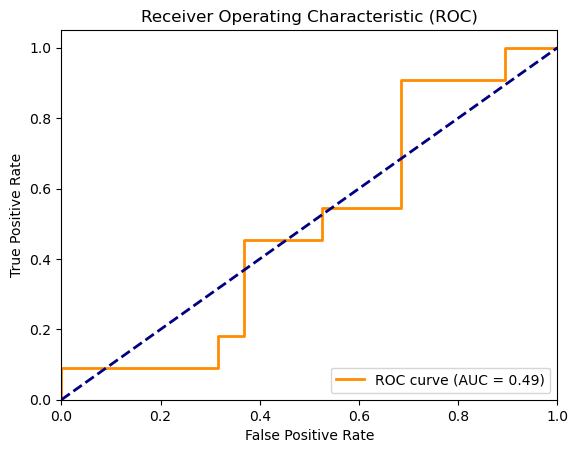

In [42]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Example DataFrame (Replace this with your actual data)
import pandas as pd
import numpy as np

# Generate a sample DataFrame (for demonstration purposes)
np.random.seed(0)
df = pd.DataFrame({
    'Feature1': np.random.randn(100),
    'Feature2': np.random.randn(100),
    'Category': np.random.choice([0, 1], size=100)  # Binary target variable
})

# Define the features (X) and the target (y)
X = df.drop('Category', axis=1)
y = df['Category']

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_score = model.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

# Compute ROC curve and ROC AUC score
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


False Positive Rates:
[0.         0.         0.31578947 0.31578947 0.36842105 0.36842105
 0.52631579 0.52631579 0.68421053 0.68421053 0.89473684 0.89473684
 1.        ]

True Positive Rates:
[0.         0.09090909 0.09090909 0.18181818 0.18181818 0.45454545
 0.45454545 0.54545455 0.54545455 0.90909091 0.90909091 1.
 1.        ]

Thresholds:
[1.83162292 0.83162292 0.66408927 0.64958897 0.64141279 0.61342216
 0.58312465 0.58291948 0.56091957 0.5047393  0.46295399 0.4418915
 0.23798396]


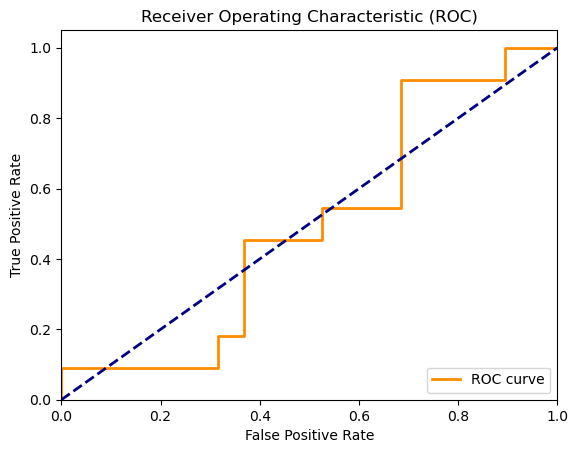

In [44]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Example DataFrame (Replace this with your actual data)
import pandas as pd
import numpy as np

# Generate a sample DataFrame (for demonstration purposes)
np.random.seed(0)
df = pd.DataFrame({
    'Feature1': np.random.randn(100),
    'Feature2': np.random.randn(100),
    'Category': np.random.choice([0, 1], size=100)  # Binary target variable
})

# Define the features (X) and the target (y)
X = df.drop('Category', axis=1)
y = df['Category']

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_score = model.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Display the False Positive Rates
print("False Positive Rates:")
print(fpr)

# Optionally, display True Positive Rates and Thresholds as well
print("\nTrue Positive Rates:")
print(tpr)

print("\nThresholds:")
print(thresholds)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


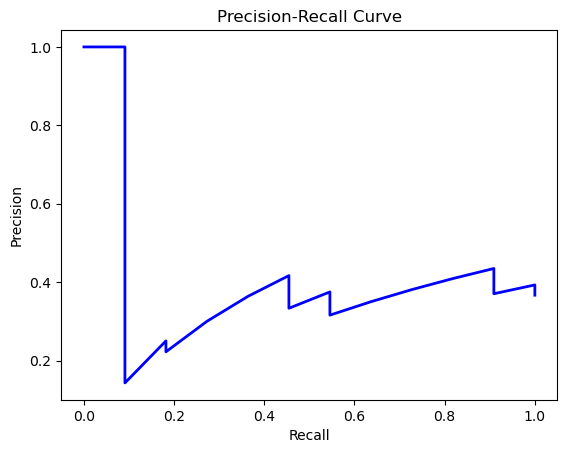

In [47]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [51]:
# Predict using the model
y_pred = model.predict(X_test)

# Check the shape of y_pred
print(f"Shape of y_pred: {y_pred.shape}")

# Calculate residuals only if shapes match
if y_test.shape == y_pred.shape:
    residuals = y_test - y_pred
else:
    print("Shape mismatch: Cannot calculate residuals.")


Shape of y_pred: (30,)


In [53]:
y_test = y_test.reset_index(drop=True)
y_pred = y_pred.reset_index(drop=True)


AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

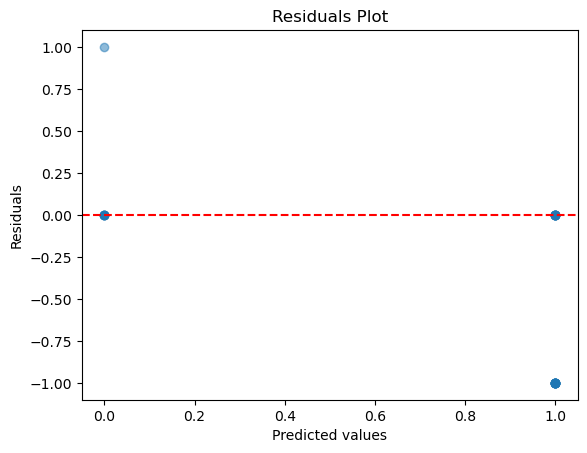

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are numpy arrays or pandas Series
if y_test.shape == y_pred.shape:
    residuals = y_test - y_pred

    plt.figure()
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.show()
else:
    print("Shape mismatch: Cannot calculate or plot residuals.")


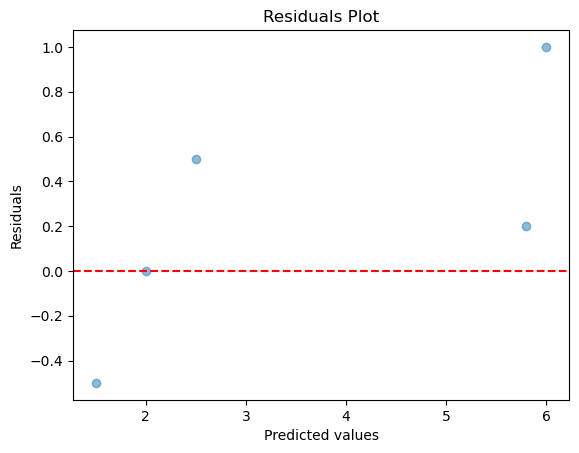

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Example setup
y_test = np.array([3, 2, 7, 1, 6])   # Actual values
y_pred = np.array([2.5, 2, 6, 1.5, 5.8])  # Predicted values

# Ensure the lengths match
if len(y_test) == len(y_pred):
    residuals = y_test - y_pred

    # Plot residuals
    plt.figure()
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.show()
else:
    print("Length mismatch: Cannot calculate or plot residuals.")
